# Proyecto fin de Formación Ciencia de Datos para Analistas de Negocio

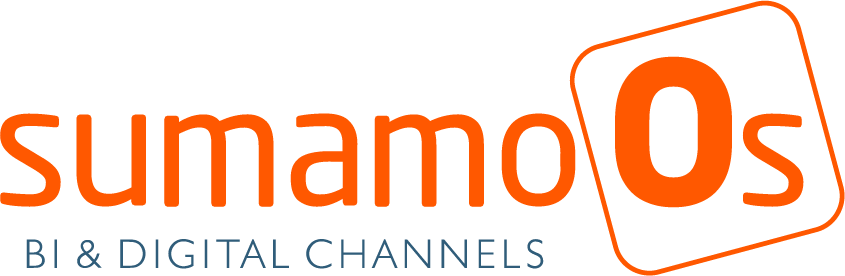

### Curso Octubre 2024 - Enero 2025

# Proyecto: Predicción de demanda

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

## Autor: Alexander Abasolo

### Descripción del proyecto

Este proyecto consiste en realizar la predicción de las ventas de la empresa en la que trabajo que se dedica a la fabricación de tuberías y accesorios de plásticos como PVC, PE, entre otros. Esto servirá para poder hacer un seguimiento más cercano de las ventas que derive en poder adelantarnos a movimientos del mercado y la optimización del stock a un nivel jerarquíco de las ventas (nivel clasificación familia). Los tipos de datos a los que accedemos son los siguientes: la fecha del pedido, la familia de clasificación, artículo, importe en euros, unidades y el peso del propio artículo.

### Conclusiones de su proyecto

(Describa las conclusiones de su proyecto)
Cuál es el resultado final de su proyecto, qué ha conseguido, cómo agrega valor a su empresa / cliente / organización 

## Análisis Exploratorio de datos

In [80]:
# cargar datos
df = pd.read_csv('datos/ventas.csv', sep=';')

In [81]:
# Convertir la columna 'FECHA_PEDIDO' a formato de fecha
df['FECHA_PEDIDO'] = pd.to_datetime(df['FECHA_PEDIDO'], format='%m/%d/%Y')

In [82]:
# Asegúrate de que las columnas numéricas tengan el tipo correcto
df['IMPORTE'] = df['IMPORTE'].str.replace(',', '.').astype(float)
df['PESO'] = df['PESO'].str.replace(',', '.').astype(float)
df['UNIDADES_SERVIDAS'] = pd.to_numeric(df['UNIDADES_SERVIDAS'], errors='coerce')

# Revisa que las columnas categóricas estén correctamente definidas
df['FAMILIA'] = df['FAMILIA'].astype('category')
df['ARTICULO'] = df['ARTICULO'].astype('category')

In [83]:
# Descomponer la fecha en componentes
df['AÑO'] = df['FECHA_PEDIDO'].dt.year
df['MES'] = df['FECHA_PEDIDO'].dt.month
df['DÍA'] = df['FECHA_PEDIDO'].dt.day
df['DÍA_DE_LA_SEMANA'] = df['FECHA_PEDIDO'].dt.weekday  # 0=Monday, 6=Sunday

# Eliminar la columna FECHA_PEDIDO si ya no es necesaria
df = df.drop(columns=['FECHA_PEDIDO'])

# Mostrar los primeros registros para ver la transformación
print(df.head())

  FAMILIA ARTICULO  IMPORTE  UNIDADES_SERVIDAS    PESO   AÑO  MES  DÍA  \
0     202   202010    13.48                5.0    8.31  2020    1    2   
1     202   202018     4.73                1.0    3.01  2020    1    2   
2     202   202022   283.97               51.0  184.16  2020    1    2   
3     202   202023     9.32                1.0    6.02  2020    1    2   
4     202   202033    32.77                4.0   21.37  2020    1    2   

   DÍA_DE_LA_SEMANA  
0                 3  
1                 3  
2                 3  
3                 3  
4                 3  


In [84]:
# Estadísticas
df.describe()

,IMPORTE,UNIDADES_SERVIDAS,PESO,AÑO,MES,DÍA,DÍA_DE_LA_SEMANA
count,647506.000000,645876.000000,647506.000000,647506.000000,647506.000000,647506.000000,647506.000000
mean,417.880049,257.326179,178.134710,2021.913836,6.342008,15.970073,2.047470
std,1217.975830,1162.854863,626.079917,1.403873,3.359585,8.779605,1.438027
min,-87827.150000,-74400.000000,-60000.000000,2020.000000,1.000000,1.000000,0.000000
25%,24.030000,8.000000,2.550000,2021.000000,3.000000,8.000000,1.000000
50%,82.880000,35.000000,12.890000,2022.000000,6.000000,16.000000,2.000000
75%,290.826525,144.000000,88.160000,2023.000000,9.000000,23.000000,3.000000
max,101113.260000,92800.000000,66723.000000,2024.000000,12.000000,31.000000,6.000000


In [85]:
# Contar los valores únicos en la columna 'ARTICULO'
num_codigos_unicos = df['ARTICULO'].nunique()
print(f'Número de códigos únicos: {num_codigos_unicos}')

Número de códigos únicos: 4006


In [86]:
from pycaret.regression import *

In [87]:
reg = RegressionExperiment()

In [88]:
reg.setup(data=df,
          target='IMPORTE',
          session_id=100,
          train_size=0.9)


,Description,Value
0,Session id,100
1,Target,IMPORTE
2,Target type,Regression
3,Original data shape,"(647506, 9)"
4,Transformed data shape,"(647506, 9)"
5,Transformed train set shape,"(582755, 9)"
6,Transformed test set shape,"(64751, 9)"
7,Numeric features,6
8,Categorical features,2
9,Rows with missing values,0.3%


In [ ]:
# MAÑANA SEGUIMOS EJECUTANDO ESTO
reg.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:02:51
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Lasso Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,145.4852,268953.8188,499.5808,0.8153,1.1385,3.2718,2.7660


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Exception ignored in: <function FastMemory.__del__ at 0x000002740E953640>
Traceback (most recent call last):
  File "c:\Users\a.abasolo\AppData\Local\anaconda3\envs\proyecto_ml\lib\site-packages\pycaret\internal\memory.py", line 448, in __del__
    self.reduce_size()
  File "c:\Users\a.abasolo\AppData\Local\anaconda3\envs\proyecto_ml\lib\site-packages\pycaret\internal\memory.py", line 432, in reduce_size
    def reduce_size(self):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
# explorar datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Seleccionar las variables independientes (features) y dependientes (target)
X = df[['AÑO', 'MES', 'DÍA', 'DÍA_DE_LA_SEMANA', 'FAMILIA', 'ARTICULO']]  # Características
y = df['IMPORTE']  # Objetivo a predecir

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: '234059F'

In [ ]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

### Conclusiones del Análisis Exploratorio de Datos

(Descripcion de conclusiones de analisis exploratorio de datos)

## Modelado y Aprendizaje Automático 

In [ ]:
# importar paquetes

In [ ]:
# ejecución y selección de modelo estadístico 

In [ ]:
# evaluación del modelo seleccionado

## Conclusiones del Modelado

(Describa por qué el modelo seleccionado es el mejor modelo para su proyecto)

## Puesta en producción 

(Describa cómo va a realizar la puesta en produccion del proyecto, y por qué lo hará de esa forma)